# Table of Contents  

1. [Introduction and Dataset Overview](#introduction-and-dataset-overview)
2. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)  
3. [Data Preprocessing](#data-preprocessing)  
4. [Machine Learning Models](#machine-learning-models)
5. [Evaluation Classification Models](#evaluation-classification-models)

## Introduction and Dataset Overview

This dataset contains 11 features that can be used to predict heart disease, a common result of cardiovascular diseases (CVDs). CVDs are the leading cause of death globally. Early detection and management are crucial for individuals at high risk of heart disease.

### Attribute Information:
- **Age**: Age of the patient [years]
- **Sex**: Sex of the patient [M: Male, F: Female]
- **ChestPainType**: Type of chest pain [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP**: Resting blood pressure [mm Hg]
- **Cholesterol**: Serum cholesterol [mm/dl]
- **FastingBS**: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG**: Resting electrocardiogram results [Normal: Normal, ST: ST-T wave abnormality, LVH: Left ventricular hypertrophy]
- **MaxHR**: Maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina**: Exercise-induced angina [Y: Yes, N: No]
- **Oldpeak**: Oldpeak = ST [Numeric value measured in depression]
- **ST_Slope**: Slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

### Target Variable:
- **HeartDisease**: Output class [1: heart disease, 0: Normal]


## Exploratory Data Analysis (EDA)

**Read the dataset and display the first few rows**

***Explanation:***
This code reads the dataset from the CSV file and displays the first 5 rows to give an overview of the data structure and column names. It helps us quickly examine the initial few records and verify the data format.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### Checking for Missing Values

In [3]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

This step checks for missing values in the dataset. Since the result is 0 for each column, it indicates that there are no missing values in any of the columns. Therefore, the dataset is complete, and we don't need to handle missing values before proceeding with further analysis.

#### Summary Statistics

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### Data Distribution and Visualization

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

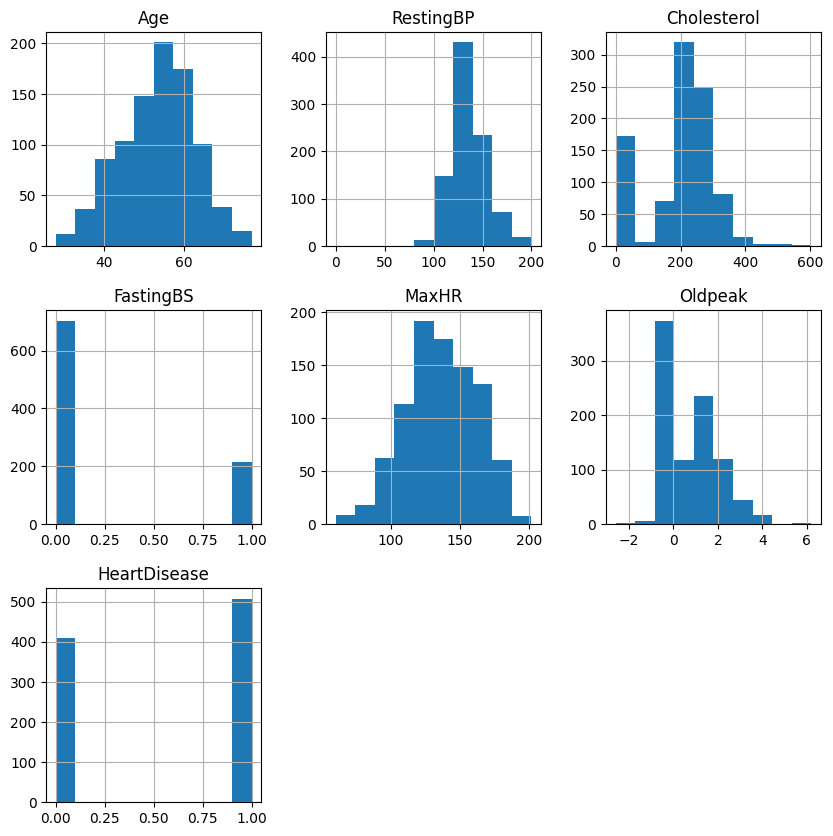

In [6]:
# Plotting histograms for numerical features

df.hist(figsize=(10, 10))
plt.show()

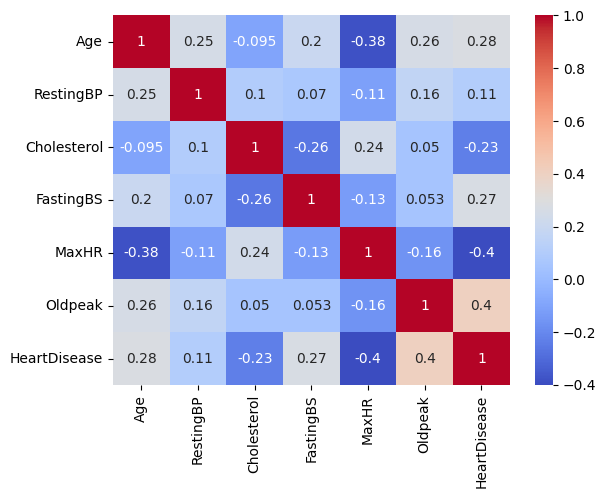

In [7]:
# Correlation heatmap
# plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [8]:
categorical_columns = list(df.select_dtypes(include=[object]).columns)

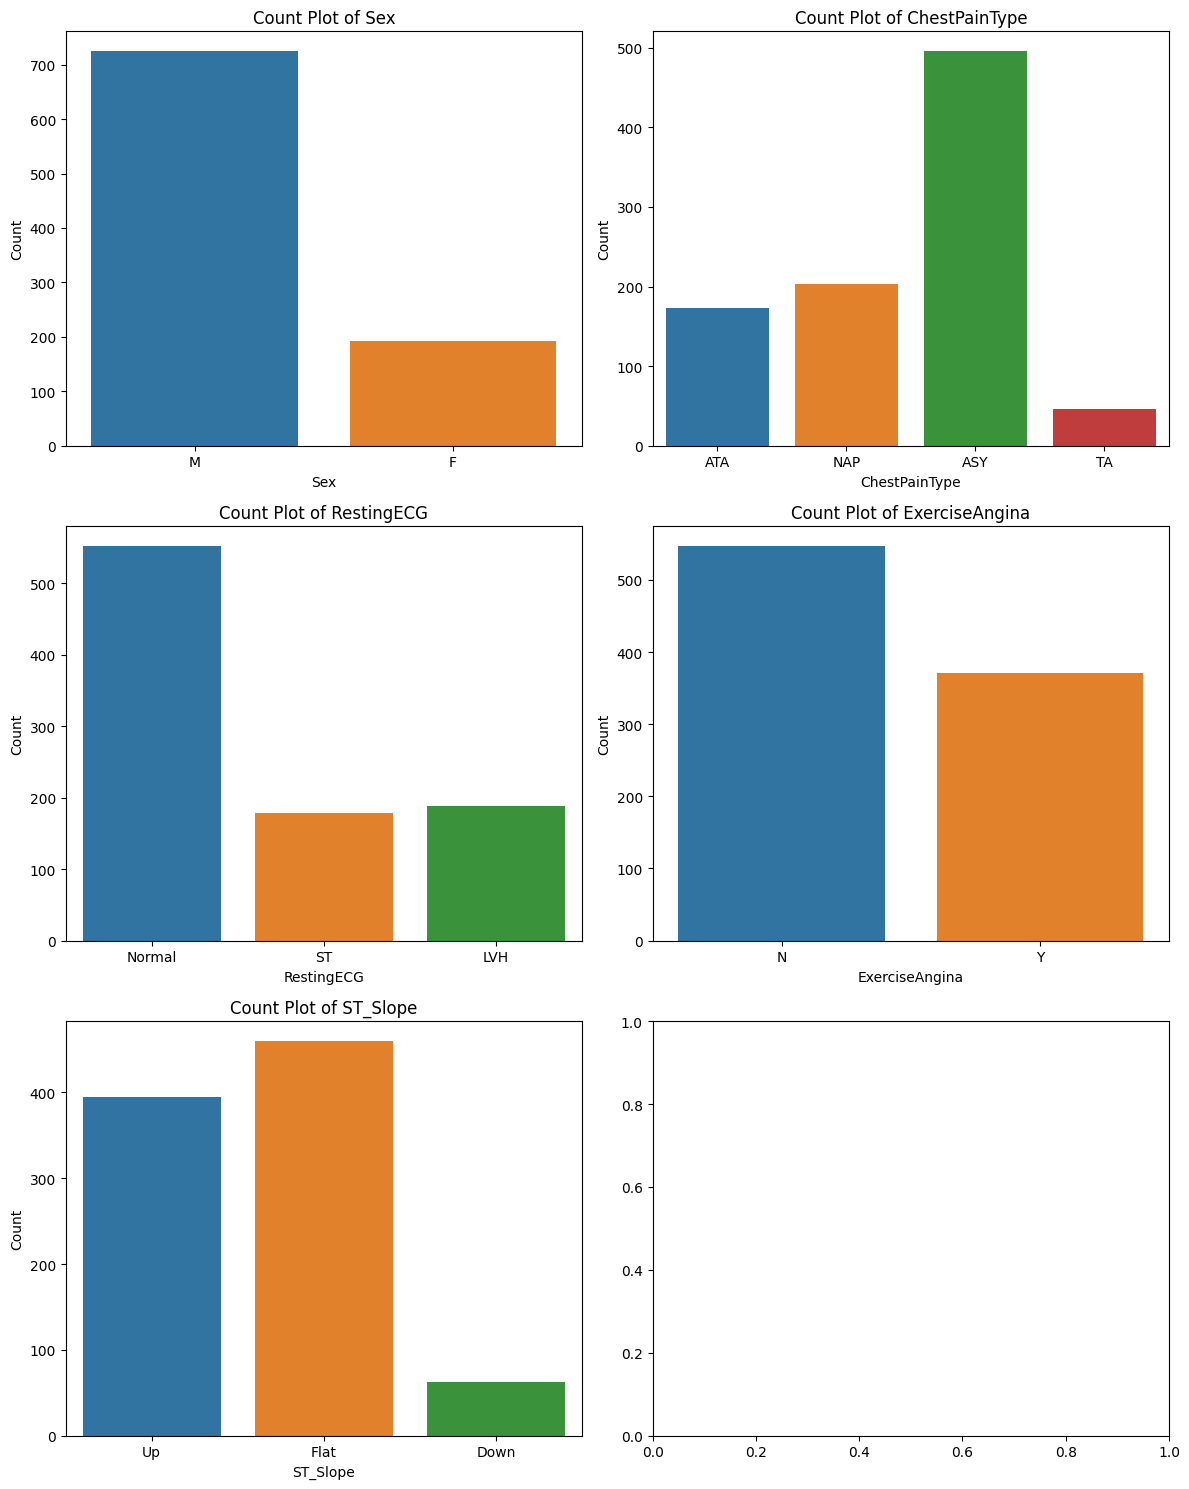

In [9]:
# Create subplots: 2 columns for better layout, and enough rows to fit all categorical plots
n_cols = 2
n_rows = (len(categorical_columns) + 1) // n_cols  # Number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot countplot for each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [10]:
# Checking class imbalance
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

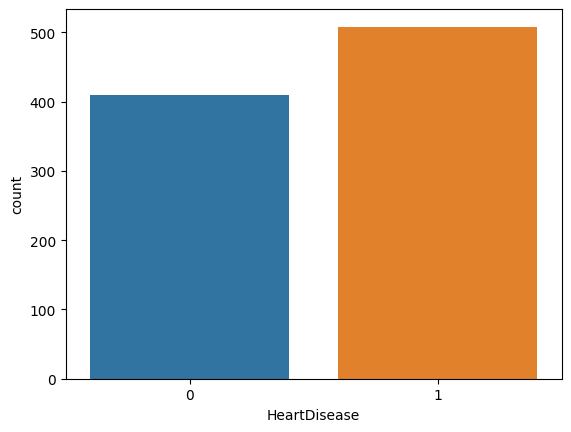

In [11]:
# Distribution of target variable
sns.countplot(x='HeartDisease', data=df)
plt.show()

### Data Preprocessing

In [12]:
# Create a copy of the original dataset
data = df.copy()

In [13]:
# Create a dictionary to store the type of categorical variable
categorical_types = {}

for column in categorical_columns:
    unique_values = df[column].nunique()  # Get the number of unique values
    if unique_values == 2:
        categorical_types[column] = 'Binary'
    else:
        categorical_types[column] = 'Multi-class'

# Display the types of categorical variables
print(categorical_types)

{'Sex': 'Binary', 'ChestPainType': 'Multi-class', 'RestingECG': 'Multi-class', 'ExerciseAngina': 'Binary', 'ST_Slope': 'Multi-class'}


**Label Encoding (Binary)**

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['ExerciseAngina'] = label_encoder.fit_transform(data['ExerciseAngina'])

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


**One-Hot Encoding (Multi-Class)**

In [15]:
data = pd.get_dummies(data, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True, dtype=int)
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,1,0,0,1


**Min-Max Scaling**

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']] = scaler.fit_transform(data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,0.244898,1,0.70,0.479270,0,0.788732,0,0.295455,0,1,0,0,1,0,0,1
1,0.428571,0,0.80,0.298507,0,0.676056,0,0.409091,1,0,1,0,1,0,1,0
2,0.183673,1,0.65,0.469320,0,0.267606,0,0.295455,0,1,0,0,0,1,0,1
3,0.408163,0,0.69,0.354892,0,0.338028,1,0.465909,1,0,0,0,1,0,1,0
4,0.530612,1,0.75,0.323383,0,0.436620,0,0.295455,0,0,1,0,1,0,0,1


***Splitting the Data into Features (X) and Target Variable (y)***

In [17]:
# features
X = data.drop(columns=['HeartDisease'])

# label
y = data['HeartDisease']

In [18]:
X.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,0.244898,1,0.70,0.479270,0,0.788732,0,0.295455,1,0,0,1,0,0,1
1,0.428571,0,0.80,0.298507,0,0.676056,0,0.409091,0,1,0,1,0,1,0
2,0.183673,1,0.65,0.469320,0,0.267606,0,0.295455,1,0,0,0,1,0,1
3,0.408163,0,0.69,0.354892,0,0.338028,1,0.465909,0,0,0,1,0,1,0
4,0.530612,1,0.75,0.323383,0,0.436620,0,0.295455,0,1,0,1,0,0,1


**Train-Test Split**

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (734, 15)
X_test shape: (184, 15)
y_train shape: (734,)
y_test shape: (184,)


## Machine Learning Models

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 1. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy:  0.8532608695652174

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

Confusion Matrix:
 [[67 10]
 [17 90]]


## 2. KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# k default 5
knn_model = KNeighborsClassifier(n_neighbors = 7)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Accuracy:  0.8532608695652174

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83        77
           1       0.88      0.86      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Confusion Matrix:
 [[65 12]
 [15 92]]


## 3. SVM

In [23]:
from sklearn.svm import SVC
svm_model = SVC(random_state=1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy:  0.8478260869565217

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        77
           1       0.88      0.85      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184

Confusion Matrix:
 [[65 12]
 [16 91]]


## 4. Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

print("Naive Bayes Accuracy: ", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes Accuracy:  0.8586956521739131

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Confusion Matrix:
 [[68  9]
 [17 90]]


## 5. Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy:  0.8369565217391305

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        77
           1       0.86      0.86      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184

Confusion Matrix:
 [[62 15]
 [15 92]]


## 6. Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 11,random_state = 1)
model_rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)

print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy:  0.8641304347826086

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

Confusion Matrix:
 [[66 11]
 [14 93]]


# Evaluation Classification Models

In [27]:
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    # Confusion MAtrix
    cm = confusion_matrix(y_true, y_pred)

    # Visualization
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True,linewidths=0.5, fmt="d", linecolor='red')
    
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

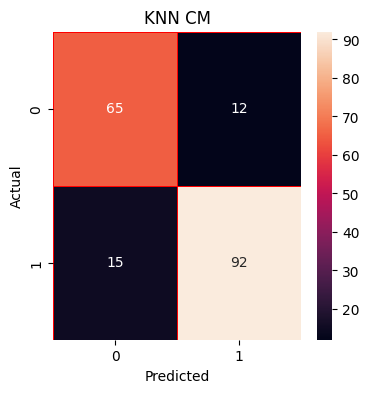

In [28]:
plot_confusion_matrix(y_test, y_pred_knn, 'KNN CM')

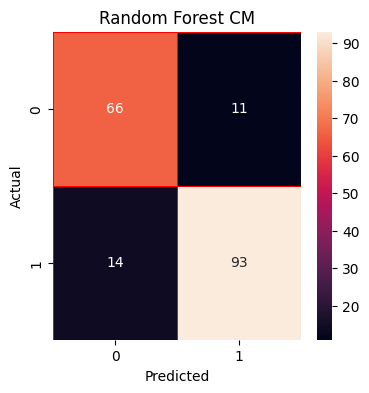

In [29]:
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest CM')

In [30]:
models = [lr_model, knn_model, svm_model, model_nb, model_dt, model_rf]
model_names = ['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest',]
accuracies = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} Accuracy: {accuracy}")

# Display model comparison
best_model_index = accuracies.index(max(accuracies))
print(f"\nBest Performing Model: {model_names[best_model_index]} with Accuracy: {accuracies[best_model_index]}")


Logistic Regression Accuracy: 0.8532608695652174
KNN Accuracy: 0.8532608695652174
SVM Accuracy: 0.8478260869565217
Naive Bayes Accuracy: 0.8586956521739131
Decision Tree Accuracy: 0.8369565217391305
Random Forest Accuracy: 0.8641304347826086

Best Performing Model: Random Forest with Accuracy: 0.8641304347826086


In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_true, y_pred_prob, title="ROC Curve"):
    
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    
    auc = roc_auc_score(y_true, y_pred_prob)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='r', linestyle='--') 
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

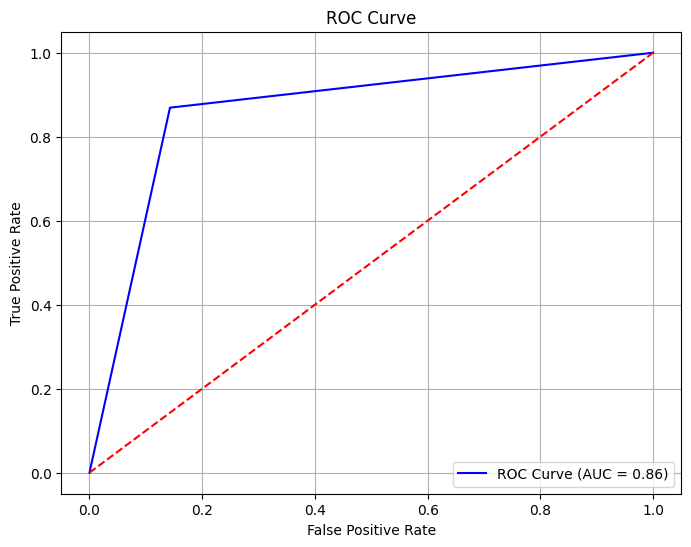

In [32]:
plot_roc_curve(y_test, y_pred_rf)

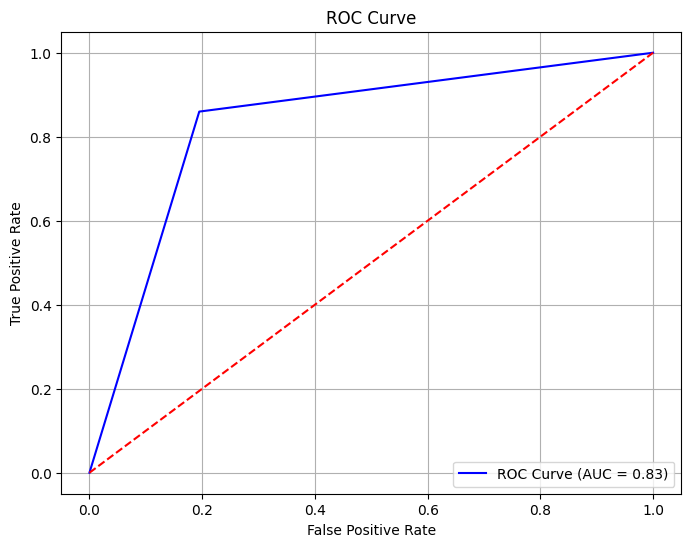

In [33]:
plot_roc_curve(y_test, y_pred_dt)